In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix


from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Things to code up

## for feature engineering bert encoding is possible but takes alot of time

## up sampling down sampling
## transformer models

# Autism Detection

#### load data

In [3]:
df = pd.read_csv("../../datasets/Autism_Data.csv")

#### exploring data

In [4]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,'18 and more',?,NO


array([<Axes: >, <Axes: >], dtype=object)

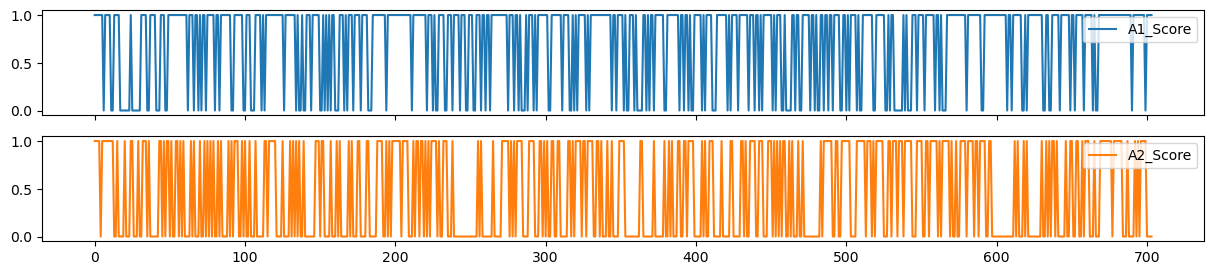

In [14]:
df[["A1_Score","A2_Score"]].plot(figsize=(15,3),subplots=True)

<Axes: ylabel='count'>

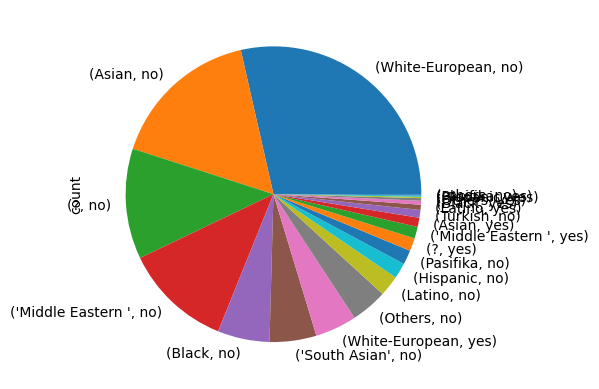

In [23]:
df[["ethnicity","jundice"]].value_counts().plot(kind='pie')

In [27]:
cols = df.columns.to_list()
df_x, y = df[cols[:-1]], df[cols[-1]]

In [28]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         704 non-null    int64 
 1   A2_Score         704 non-null    int64 
 2   A3_Score         704 non-null    int64 
 3   A4_Score         704 non-null    int64 
 4   A5_Score         704 non-null    int64 
 5   A6_Score         704 non-null    int64 
 6   A7_Score         704 non-null    int64 
 7   A8_Score         704 non-null    int64 
 8   A9_Score         704 non-null    int64 
 9   A10_Score        704 non-null    int64 
 10  age              704 non-null    object
 11  gender           704 non-null    object
 12  ethnicity        704 non-null    object
 13  jundice          704 non-null    object
 14  austim           704 non-null    object
 15  contry_of_res    704 non-null    object
 16  used_app_before  704 non-null    object
 17  result           704 non-null    in

In [29]:
df_x.shape

(704, 20)

In [30]:
# # Fixing the dtype of obj that can be int

# df_x['age'] = pd.to_numeric(df_x['age'], errors='coerce')
# mean_x = df_x['age'].mean()
# df_x['age'] = df_x['age'].fillna(mean_x).astype(int)
# df_x['age'] = df_x['age'].astype(int)
# df_x.age.value_counts().plot(kind='bar')

In [31]:
objcols = df_x.select_dtypes(include=['object']).columns.to_list()
objcols

['age',
 'gender',
 'ethnicity',
 'jundice',
 'austim',
 'contry_of_res',
 'used_app_before',
 'age_desc',
 'relation']

#### Using factorize

In [9]:
df_x.replace('?', np.nan, inplace=True)
for col in objcols:
    df_x[col] = pd.factorize(df[col], use_na_sentinel=-1)[0]
    
df_x

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,6,0,0
1,1,1,0,1,0,0,0,1,0,1,1,1,1,0,1,1,0,5,0,0
2,1,1,0,1,1,0,1,1,1,1,2,1,1,1,1,2,0,8,0,1
3,1,1,0,1,0,0,1,1,0,1,3,0,0,0,1,0,0,6,0,0
4,1,0,0,0,0,0,0,1,0,0,4,0,2,0,0,3,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,35,0,0,0,0,40,0,7,0,0
700,1,0,0,0,0,0,0,1,0,1,13,1,9,0,0,39,0,3,0,1
701,1,0,1,1,1,0,1,1,0,1,1,0,2,0,0,40,0,7,0,2
702,1,0,0,1,1,0,1,0,1,1,3,1,8,0,0,17,0,6,0,0


#### Using Label Encoder

In [32]:
l_encoder = {}
for col in objcols:
    encoder = LabelEncoder()
    df_x[col] = df_x[col].astype(str)  # Convert all values to string to prevent NaN issues
    df_x[col] = df_x[col].replace('nan', 'Missing')  # Replace NaN with a placeholder
    df_x[col] = encoder.fit_transform(df_x[col])
    l_encoder[col] = dict(zip(encoder.classes_, range(len(encoder.classes_))))  # Store mapping

In [33]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   A1_Score         704 non-null    int64
 1   A2_Score         704 non-null    int64
 2   A3_Score         704 non-null    int64
 3   A4_Score         704 non-null    int64
 4   A5_Score         704 non-null    int64
 5   A6_Score         704 non-null    int64
 6   A7_Score         704 non-null    int64
 7   A8_Score         704 non-null    int64
 8   A9_Score         704 non-null    int64
 9   A10_Score        704 non-null    int64
 10  age              704 non-null    int64
 11  gender           704 non-null    int64
 12  ethnicity        704 non-null    int64
 13  jundice          704 non-null    int64
 14  austim           704 non-null    int64
 15  contry_of_res    704 non-null    int64
 16  used_app_before  704 non-null    int64
 17  result           704 non-null    int64
 18  age_desc  

<Axes: xlabel='age'>

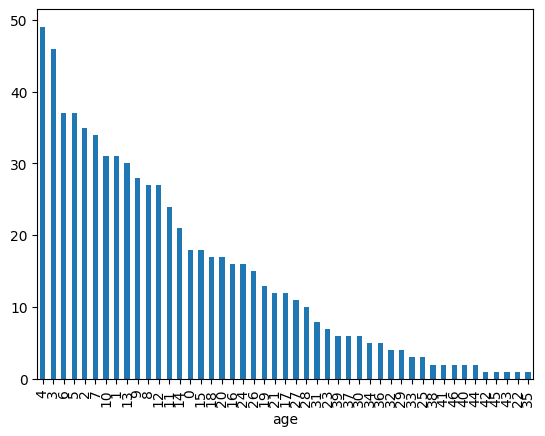

In [11]:
df_x.age.value_counts().plot(kind='bar')

<Axes: xlabel='age'>

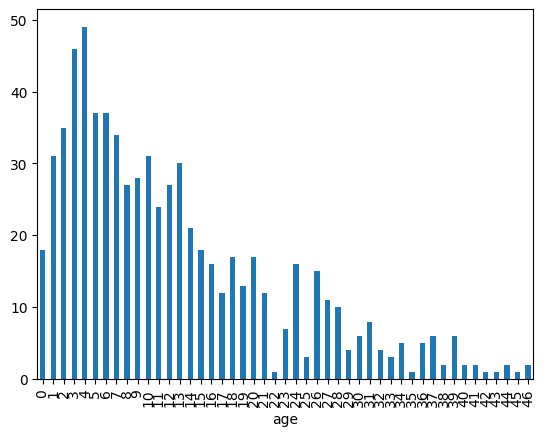

In [12]:
df_x.age.value_counts().sort_index().plot(kind='bar')

In [13]:
l_encoder["age"]

{'17': 0,
 '18': 1,
 '19': 2,
 '20': 3,
 '21': 4,
 '22': 5,
 '23': 6,
 '24': 7,
 '25': 8,
 '26': 9,
 '27': 10,
 '28': 11,
 '29': 12,
 '30': 13,
 '31': 14,
 '32': 15,
 '33': 16,
 '34': 17,
 '35': 18,
 '36': 19,
 '37': 20,
 '38': 21,
 '383': 22,
 '39': 23,
 '40': 24,
 '41': 25,
 '42': 26,
 '43': 27,
 '44': 28,
 '45': 29,
 '46': 30,
 '47': 31,
 '48': 32,
 '49': 33,
 '50': 34,
 '51': 35,
 '52': 36,
 '53': 37,
 '54': 38,
 '55': 39,
 '56': 40,
 '58': 41,
 '59': 42,
 '60': 43,
 '61': 44,
 '64': 45,
 '?': 46}

In [14]:
df_x

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,1,1,1,0,0,1,1,0,0,9,0,10,0,0,10,0,6,0,5
1,1,1,0,1,0,0,0,1,0,1,7,1,6,0,1,25,0,5,0,5
2,1,1,0,1,1,0,1,1,1,1,10,1,6,1,1,61,0,8,0,3
3,1,1,0,1,0,0,1,1,0,1,18,0,10,0,1,10,0,6,0,5
4,1,0,0,0,0,0,0,1,0,0,24,0,2,0,0,32,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,8,0,10,0,0,59,0,7,0,5
700,1,0,0,0,0,0,0,1,0,1,17,1,5,0,0,49,0,3,0,3
701,1,0,1,1,1,0,1,1,0,1,7,0,2,0,0,59,0,7,0,1
702,1,0,0,1,1,0,1,0,1,1,18,1,1,0,0,55,0,6,0,5


#### Scaling features

In [34]:
df_x.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,1,1,1,0,0,1,1,0,0,9,0,10,0,0,10,0,6,0,5
1,1,1,0,1,0,0,0,1,0,1,7,1,6,0,1,25,0,5,0,5
2,1,1,0,1,1,0,1,1,1,1,10,1,6,1,1,61,0,8,0,3
3,1,1,0,1,0,0,1,1,0,1,18,0,10,0,1,10,0,6,0,5
4,1,0,0,0,0,0,0,1,0,0,24,0,2,0,0,32,0,2,0,1


In [16]:
y = y.map({"NO":0,"YES":1})
y

0      0
1      0
2      1
3      0
4      0
      ..
699    1
700    0
701    1
702    0
703    1
Name: Class/ASD, Length: 704, dtype: int64

In [39]:
df_x.columns[df_x.max(axis=0) > 1]

Index(['age', 'ethnicity', 'contry_of_res', 'result', 'relation'], dtype='object')

In [36]:
df_x[df_x.columns[df_x.max(axis=0) > 1]]

,age,ethnicity,contry_of_res,result,relation
0,9,10,10,6,5
1,7,6,25,5,5
2,10,6,61,8,3
3,18,10,10,6,5
4,24,2,32,2,1
...,...,...,...,...,...
699,8,10,59,7,5
700,17,5,49,3,3
701,7,2,59,7,1
702,18,1,55,6,5


In [18]:
scale_cols = df_x[df_x.columns[df_x.max(axis=0) > 1]].columns
scale_cols

Index(['age', 'ethnicity', 'contry_of_res', 'result', 'relation'], dtype='object')

In [19]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_x[scale_cols])

In [20]:
scaler.mean_, scaler.feature_names_in_, scaler.n_samples_seen_, scaler.n_features_in_

(array([12.46306818,  5.18892045, 21.05539773,  4.875     ,  4.22869318]),
 array(['age', 'ethnicity', 'contry_of_res', 'result', 'relation'],
       dtype=object),
 704,
 5)

In [21]:
scaled_data, df_x

(array([[-0.34236356,  1.24898288, -0.64699207,  0.45005115,  0.53301347],
        [-0.54008623,  0.21056074,  0.2308489 ,  0.05000568,  0.53301347],
        [-0.24350222,  0.21056074,  2.33766724,  1.25014207, -0.84909144],
        ...,
        [-0.54008623, -0.8278614 ,  2.22062178,  0.85009661, -2.23119635],
        [ 0.54738849, -1.08746693,  1.98653085,  0.45005115,  0.53301347],
        [-0.34236356,  1.24898288,  0.52346256,  1.25014207,  0.53301347]]),
      A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
 0           1         1         1         1         0         0         1   
 1           1         1         0         1         0         0         0   
 2           1         1         0         1         1         0         1   
 3           1         1         0         1         0         0         1   
 4           1         0         0         0         0         0         0   
 ..        ...       ...       ...       ...       ...       ...   

In [22]:
df_x[scale_cols] = scaled_data

In [23]:
df_x 

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,1,1,1,0,0,1,1,0,0,-0.342364,0,1.248983,0,0,-0.646992,0,0.450051,0,0.533013
1,1,1,0,1,0,0,0,1,0,1,-0.540086,1,0.210561,0,1,0.230849,0,0.050006,0,0.533013
2,1,1,0,1,1,0,1,1,1,1,-0.243502,1,0.210561,1,1,2.337667,0,1.250142,0,-0.849091
3,1,1,0,1,0,0,1,1,0,1,0.547388,0,1.248983,0,1,-0.646992,0,0.450051,0,0.533013
4,1,0,0,0,0,0,0,1,0,0,1.140557,0,-0.827861,0,0,0.640508,0,-1.150131,0,-2.231196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,-0.441225,0,1.248983,0,0,2.220622,0,0.850097,0,0.533013
700,1,0,0,0,0,0,0,1,0,1,0.448527,1,-0.049045,0,0,1.635394,0,-0.750085,0,-0.849091
701,1,0,1,1,1,0,1,1,0,1,-0.540086,0,-0.827861,0,0,2.220622,0,0.850097,0,-2.231196
702,1,0,0,1,1,0,1,0,1,1,0.547388,1,-1.087467,0,0,1.986531,0,0.450051,0,0.533013


### train the models

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df_x, y, test_size=0.2, random_state=42)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((563, 20), (141, 20), (563,), (141,))

#### LR

In [28]:
clf = LogisticRegression()
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1')
print(scores)

[0.98360656 1.         1.         1.         1.        ]


In [29]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

<Axes: >

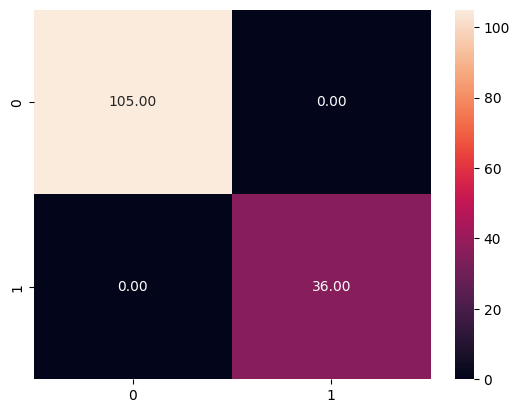

In [30]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".2f")

#### rf model

In [ ]:

rf_grid = RandomForestClassifier()
gr_space = {
    'max_depth': [3,5,7,10],
    'n_estimators': [100],
    'max_features': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(rf_grid, gr_space, cv = 3, scoring='accuracy', verbose = 3)
model_grid = grid.fit(X_train, y_train)

print('Best hyperparameters are '+str(model_grid.best_params_))
print('Best score is: ' + str(model_grid.best_score_))